In [1]:
import math

def entropy(probabilities):
    return -sum(p * math.log2(p) if p > 0 else 0 for p in probabilities)

def information_gain(data, attribute_index, target_index):
    total_instances = len(data)
    target_values = set(data[i][target_index] for i in range(total_instances))
    target_probabilities = [sum(1 for row in data if row[target_index] == value) / total_instances for value in target_values]
    entropy_before = entropy(target_probabilities)
    
    attribute_values = set(data[i][attribute_index] for i in range(total_instances))
    weighted_entropy_after = 0
    
    for value in attribute_values:
        subset = [row for row in data if row[attribute_index] == value]
        subset_size = len(subset)
        subset_target_probabilities = [sum(1 for row in subset if row[target_index] == target_value) / subset_size for target_value in target_values]
        weighted_entropy_after += (subset_size / total_instances) * entropy(subset_target_probabilities)
    
    information_gain = entropy_before - weighted_entropy_after
    return information_gain

data = [
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31…40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31…40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31…40", "medium", "no", "excellent", "yes"],
    ["31…40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
]

target_index = 4
attributes = ["age", "income", "student", "credit_rating"]

information_gains = {}
for attribute_index, attribute in enumerate(attributes):
    gain = information_gain(data, attribute_index, target_index)
    information_gains[attribute] = gain

root_attribute = max(information_gains, key=information_gains.get)
root_information_gain = information_gains[root_attribute]

print(f"The root node is '{root_attribute}' with Information Gain of {root_information_gain:.3f}")


The root node is 'age' with Information Gain of 0.247


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = [
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31…40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31…40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31…40", "medium", "no", "excellent", "yes"],
    ["31…40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

tree_depth = pipeline.named_steps["classifier"].get_depth()

print(f"Tree depth: {tree_depth}")

Tree depth: 4


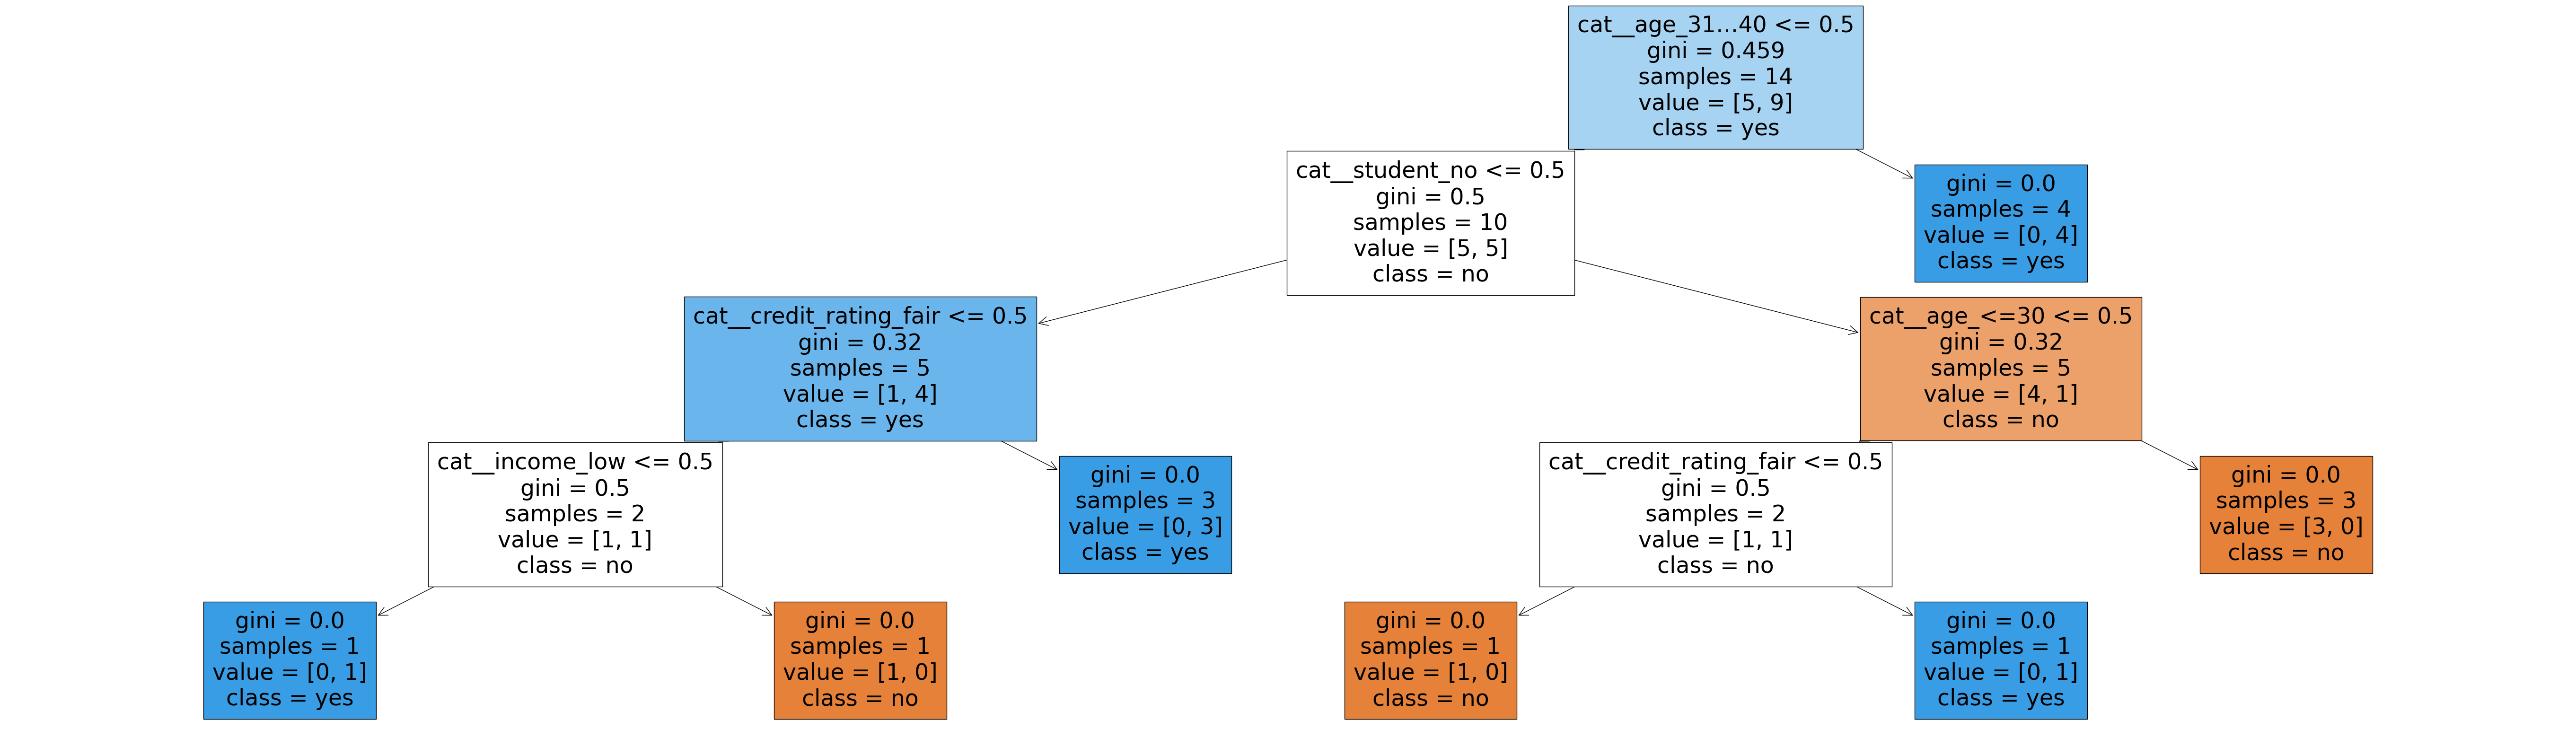

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = [
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31…40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31…40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31…40", "medium", "no", "excellent", "yes"],
    ["31…40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

feature_names = list(pipeline.named_steps["preprocessor"].get_feature_names_out(input_features=categorical_features)) + list(X.columns.drop(categorical_features))

plt.figure(figsize=(70, 20))
plot_tree(pipeline.named_steps["classifier"], filled=True, feature_names=feature_names, class_names=['no', 'yes'])
plt.show()

Training Set Accuracy: 100.00%
Test Set Accuracy: 100.00%


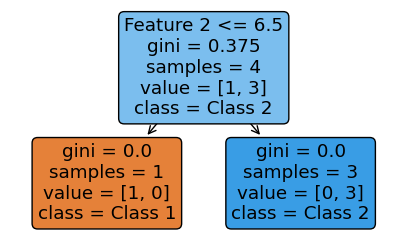

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = np.array([[1, 2], [3, 4], [5, 6], [6, 7], [8, 9], [10, 11]])
labels = np.array([0, 0, 0, 1, 1, 1])

Tr_X, Te_X, Tr_y, Te_y = train_test_split(data, labels, test_size=0.22, random_state=42)

ml_model = DecisionTreeClassifier()
model = ml_model.fit(Tr_X, Tr_y)

train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)
print(f"Training Set Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")
plt.figure(figsize=(5,3))
plot_tree(model, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 1", "Class 2"], rounded=True)
plt.show()
